In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf



In [45]:
data = pd.read_csv("/Users/swetarai/GSE_merging_data/mergeDatasets_raw.csv")
data.describe()

,batch,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,...,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,1.878571,3.404847,3.220587,3.599162,3.662413,2.212593,3.809161,3.211291,2.301299,3.769689,...,3.007183,3.188942,2.282413,2.468621,2.704038,3.337594,2.855524,3.026234,3.815212,3.541921
std,1.139424,1.986183,1.548786,1.773669,2.293791,1.439003,1.949313,1.221101,1.097433,1.756885,...,1.181688,1.494665,0.962913,1.135663,1.331829,1.861329,1.111807,1.299339,3.128460,1.802287
min,1.000000,2.210258,1.964559,1.728864,2.534285,0.763222,2.775475,2.462072,1.233658,1.247759,...,2.255878,2.186658,1.149844,1.090509,1.734007,1.945942,1.898587,2.145657,2.242118,2.289721
25%,1.000000,2.478760,2.636182,2.736942,2.719168,1.762180,3.066759,2.693345,1.924776,3.261793,...,2.552658,2.649374,1.933726,2.055486,2.159471,2.625809,2.396772,2.370184,2.547735,2.871153
50%,2.000000,2.862690,2.740673,3.269271,2.939280,1.802428,3.107533,2.761081,1.983701,3.533784,...,2.615989,2.709300,2.006830,2.197090,2.261914,2.727606,2.517815,2.729734,2.817632,2.931238
75%,2.000000,2.902721,2.787678,3.339580,2.976071,1.848038,3.241116,2.951456,2.069982,3.585457,...,2.682912,2.755676,2.108431,2.291594,2.391132,2.816695,2.630588,2.771166,2.870993,2.978027
max,5.000000,10.030543,8.604368,9.539353,10.568279,8.688950,9.825185,7.313790,6.680043,11.209295,...,7.335783,8.093286,6.411087,7.541654,7.398316,9.620854,6.776104,7.802193,13.511456,9.589277


In [46]:
data.head()

,Unnamed: 0,batch,sample,V1,Gender,Disease_state,platform,tissue,DDR1,RFC2,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,GSM2449608,1,GSM2449608,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,GSM2449609,1,GSM2449609,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,GSM2449610,1,GSM2449610,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,GSM2449611,1,GSM2449611,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,GSM2449612,1,GSM2449612,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008


In [47]:
data = data.drop('V1', axis=1)

In [48]:
data['Gender']

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
555      Male
556    Female
557      Male
558      Male
559      Male
Name: Gender, Length: 560, dtype: object

In [49]:
rows, columns = data.shape

In [50]:
data = data.drop('Unnamed: 0', axis=1)

In [51]:
# Get the indices of rows where 'Disease' is 'OA'
indices_to_drop = data[data['Disease_state'] == 'OA'].index

# Drop these rows
df_filtered = data.drop(indices_to_drop)

# Display the filtered DataFrame
df_filtered

,batch,sample,Gender,Disease_state,platform,tissue,DDR1,RFC2,HSPA6,PAX8,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,1,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,3.200373,3.008607,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,1,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,3.187529,2.991917,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,1,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,3.253123,2.971649,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,1,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,3.333800,3.020300,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,1,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,3.266168,2.980154,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.655209,7.431121,8.700752,10.113026,...,6.577671,7.126281,4.336341,5.998381,6.113050,7.554481,5.249426,7.802167,11.379362,9.049751
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,8.841976,7.277250,8.234683,9.800434,...,5.944969,5.988112,5.164798,4.749352,6.594829,8.940687,6.609307,6.646177,13.511456,8.360654
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.889370,7.637270,8.803172,9.716394,...,6.518371,7.221036,4.485807,5.947718,6.000559,9.543925,5.079634,6.120532,13.139505,8.224006
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,8.851196,7.001431,8.887422,10.197770,...,6.360350,7.374926,4.834696,7.143159,6.299750,9.620854,6.021862,5.761626,13.128373,8.319234


In [53]:
df_filtered

,batch,sample,Gender,Disease_state,platform,tissue,DDR1,RFC2,HSPA6,PAX8,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,1,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,3.200373,3.008607,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,1,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,3.187529,2.991917,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,1,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,3.253123,2.971649,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,1,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,3.333800,3.020300,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,1,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,3.266168,2.980154,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.655209,7.431121,8.700752,10.113026,...,6.577671,7.126281,4.336341,5.998381,6.113050,7.554481,5.249426,7.802167,11.379362,9.049751
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,8.841976,7.277250,8.234683,9.800434,...,5.944969,5.988112,5.164798,4.749352,6.594829,8.940687,6.609307,6.646177,13.511456,8.360654
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.889370,7.637270,8.803172,9.716394,...,6.518371,7.221036,4.485807,5.947718,6.000559,9.543925,5.079634,6.120532,13.139505,8.224006
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,8.851196,7.001431,8.887422,10.197770,...,6.360350,7.374926,4.834696,7.143159,6.299750,9.620854,6.021862,5.761626,13.128373,8.319234


In [52]:
df_filtered.to_csv("/Users/swetarai/GSE_merging_data/data.csv")

# EDA

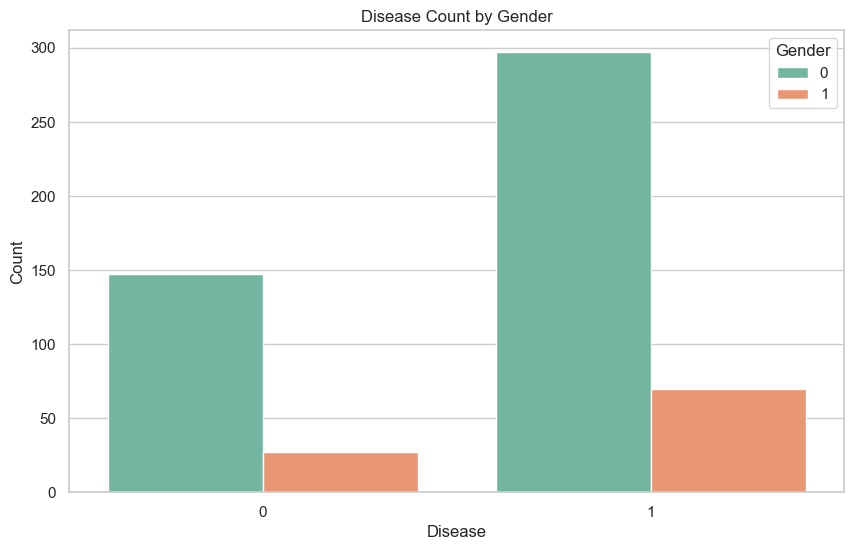

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set(style="whitegrid")

# Bar plot of disease count by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease_state', hue='Gender', data=df_filtered, palette='Set2')
plt.title('Disease Count by Gender')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

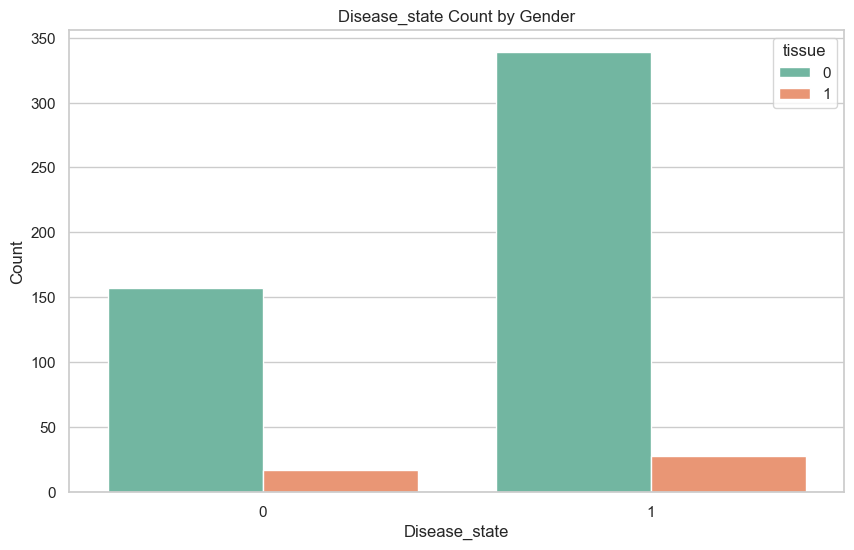

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set(style="whitegrid")

# Bar plot of disease count by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease_state', hue='tissue', data=df_filtered, palette='Set2')
plt.title('Disease_state Count by Gender')
plt.xlabel('Disease_state')
plt.ylabel('Count')
plt.legend(title='tissue')
plt.show()

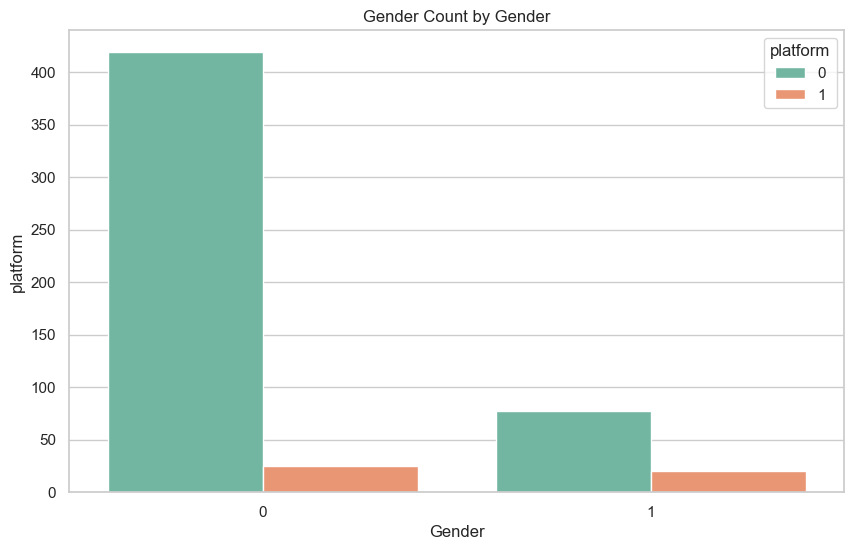

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set(style="whitegrid")

# Bar plot of disease count by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='platform', data=df_filtered, palette='Set2')
plt.title('Gender Count by Gender')
plt.xlabel('Gender')
plt.ylabel('platform')
plt.legend(title='platform')
plt.show()

In [232]:
!pip install pandas numpy rpy2

In [42]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Activate pandas to R conversion
pandas2ri.activate()

# Import R packages
limma = importr('limma')
base = importr('base')
stats = importr('stats')

In [54]:
df_filtered

,batch,sample,Gender,Disease_state,platform,tissue,DDR1,RFC2,HSPA6,PAX8,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,1,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,3.200373,3.008607,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,1,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,3.187529,2.991917,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,1,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,3.253123,2.971649,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,1,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,3.333800,3.020300,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,1,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,3.266168,2.980154,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.655209,7.431121,8.700752,10.113026,...,6.577671,7.126281,4.336341,5.998381,6.113050,7.554481,5.249426,7.802167,11.379362,9.049751
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,8.841976,7.277250,8.234683,9.800434,...,5.944969,5.988112,5.164798,4.749352,6.594829,8.940687,6.609307,6.646177,13.511456,8.360654
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.889370,7.637270,8.803172,9.716394,...,6.518371,7.221036,4.485807,5.947718,6.000559,9.543925,5.079634,6.120532,13.139505,8.224006
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,8.851196,7.001431,8.887422,10.197770,...,6.360350,7.374926,4.834696,7.143159,6.299750,9.620854,6.021862,5.761626,13.128373,8.319234


In [481]:
# Separate gene expression data
sample_metadata = df_filtered.iloc[:, 1:6]  # Adjust column indices based on your dataset

# Separate sample metadata
expression_data = df_filtered.iloc[:, 6:]  # Adjust column indices based on your dataset

# Display the separated data
print("Expression Data:")
print(expression_data.head())

print("\nSample Metadata:")
print(sample_metadata.head())

Expression Data:
       DDR1      RFC2     HSPA6      PAX8    GUCA1A   MIR5193      THRA  \
0  2.928353  2.681279  3.200373  3.008607  1.814431  3.035352  2.794960   
1  2.919860  2.642563  3.187529  2.991917  1.766750  3.072702  2.880967   
2  2.862128  2.689835  3.253123  2.971649  1.773704  3.045336  2.872246   
3  2.889364  2.705528  3.333800  3.020300  1.750219  3.086978  2.900855   
4  2.920884  2.733763  3.266168  2.980154  1.768860  3.085212  2.806505   

     PTPN21      CCL5    CYP2E1  ...  RNF126P1    FBXO31    TUBBP5   SLC44A1  \
0  1.993711  3.573319  1.875712  ...  2.624859  2.736003  2.069594  2.216733   
1  2.036722  3.561053  1.895540  ...  2.676496  2.777428  1.977371  2.089180   
2  1.892788  3.585422  1.928704  ...  2.609112  2.720926  1.990827  2.276939   
3  2.033047  3.598813  1.828633  ...  2.636405  2.703822  2.106693  2.162562   
4  1.898818  3.527495  1.766527  ...  2.507453  2.749563  1.939392  2.258863   

      TBCEL    NPEPL1    RBM12B     GALR3  MINOS1-N

In [482]:
# Convert expression data to an R matrix
expression_matrix = pandas2ri.py2rpy(expression_data)

# Convert sample metadata to an R data frame
sample_metadata_r = pandas2ri.py2rpy(sample_metadata)

In [483]:
# Transpose the expression data
expression_data = expression_data.T

# Display the transposed data
print(expression_data.head())

             0         1         2         3         4         5         6    \
DDR1    2.928353  2.919860  2.862128  2.889364  2.920884  2.870000  2.927075   
RFC2    2.681279  2.642563  2.689835  2.705528  2.733763  2.726157  2.636703   
HSPA6   3.200373  3.187529  3.253123  3.333800  3.266168  3.275608  3.190540   
PAX8    3.008607  2.991917  2.971649  3.020300  2.980154  2.990279  2.971847   
GUCA1A  1.814431  1.766750  1.773704  1.750219  1.768860  1.678898  1.837825   

             7         8         9    ...       544        550       551  \
DDR1    2.881789  2.887258  2.931180  ...  8.804509   8.847455  8.804993   
RFC2    2.667755  2.666491  2.649811  ...  7.999233   7.004086  6.643165   
HSPA6   3.253989  3.256648  3.274433  ...  7.351831   8.359890  8.936423   
PAX8    2.996316  2.954876  2.995680  ...  9.817929  10.091396  9.723927   
GUCA1A  1.840322  1.772330  1.761832  ...  5.933025   7.057429  6.341674   

              552        554        555       556       557   

In [55]:
# Convert expression data to an R matrix
expression_matrix = pandas2ri.py2rpy(expression_data)

# Convert sample metadata to an R data frame
sample_metadata_r = pandas2ri.py2rpy(sample_metadata)

NameError: name 'expression_data' is not defined

In [485]:
sample_metadata_r

sample,Gender,Disease_state,platform,tissue
...,...,...,...,...


In [486]:
# Create a design matrix with multiple factors
design_formula = ro.Formula('~ Gender + Disease_state')
design = stats.model_matrix(design_formula, data=sample_metadata_r)

# Display the design matrix
design

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [487]:
design

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [488]:
# Fit the linear model
fit = limma.lmFit(expression_matrix, design)
fit = limma.eBayes(fit)

In [489]:
# Extract top differentially expressed genes
top_genes = limma.topTable(fit, coef=2, number=base.nrow(expression_matrix))

# Convert the result back to a pandas DataFrame
top_genes_df = pandas2ri.rpy2py(top_genes)

# Display the top genes
print(top_genes_df)

                 logFC   AveExpr          t       P.Value     adj.P.Val  \
EIF1AY        1.881678  1.993867  15.996096  1.893300e-47  2.434027e-43   
RPS4Y1        2.491932  2.912743  12.004709  1.331234e-29  8.557173e-26   
TXLNGY        1.375275  2.342976  11.380848  4.693866e-27  2.011478e-23   
USP9Y         1.311938  2.008855  11.245150  1.640259e-26  5.271792e-23   
KDM5D         1.885024  2.558890  11.137184  4.409816e-26  1.133852e-22   
...                ...       ...        ...           ...           ...   
MYOZ2         0.001673  1.872884   0.030384  9.757721e-01  9.760758e-01   
RP3-452M16.1  0.000300  1.594066   0.008542  9.931878e-01  9.934196e-01   
ST8SIA5      -0.000369  2.167256  -0.008193  9.934663e-01  9.936208e-01   
MGAM         -0.000263  2.732081  -0.002646  9.978894e-01  9.979670e-01   
ST18          0.000108  1.854303   0.001556  9.987594e-01  9.987594e-01   

                      B  
EIF1AY        95.234593  
RPS4Y1        55.715606  
TXLNGY        50.0702

In [490]:
# Apply log2FC and p-value cutoffs
log2fc_cutoff = 1 # |log2FC| > 1
p_value_cutoff = 0.05  # adj.P.Val < 0.05

# Filter the results
filtered_genes = top_genes_df[
    (abs(top_genes_df['logFC']) > log2fc_cutoff) & 
    (top_genes_df['adj.P.Val'] < p_value_cutoff)
]

# Display the filtered results
print("Filtered Genes:")
filtered_genes

Filtered Genes:


,logFC,AveExpr,t,P.Value,adj.P.Val,B
EIF1AY,1.881678,1.993867,15.996096,1.893300e-47,2.434027e-43,95.234593
RPS4Y1,2.491932,2.912743,12.004709,1.331234e-29,8.557173e-26,55.715606
TXLNGY,1.375275,2.342976,11.380848,4.693866e-27,2.011478e-23,50.070227
USP9Y,1.311938,2.008855,11.245150,1.640259e-26,5.271792e-23,48.866031
KDM5D,1.885024,2.558890,11.137184,4.409816e-26,1.133852e-22,47.914223
...,...,...,...,...,...,...
RAB31,1.016771,3.699314,3.816381,1.510491e-04,1.834566e-04,0.589965
F13A1,1.094001,3.525888,3.793876,1.650331e-04,1.996862e-04,0.508637
TMEM176B,1.025915,3.401440,3.702183,2.356459e-04,2.796256e-04,0.181991
CHI3L1,1.034661,3.288778,3.630078,3.102159e-04,3.635800e-04,-0.069544


In [491]:
filtered_genes.to_csv("/Users/swetarai/GSE_merging_data/sex_specific_topgenes.csv")

In [492]:
significant_genes = filtered_genes.index  

In [493]:
significant_genes

Index(['EIF1AY', 'RPS4Y1', 'TXLNGY', 'USP9Y', 'KDM5D', 'DDX3Y', 'PRKY',
       'TTTY15', 'NR4A2', 'FOSB',
       ...
       'PLBD1', 'IFI27', 'BASP1', 'TNS3', 'SPARC', 'RAB31', 'F13A1',
       'TMEM176B', 'CHI3L1', 'IGHG1'],
      dtype='object', length=2352)

In [494]:
import pandas as pd


# Check if all genes in significant_genes exist in the dataset
missing_genes = [gene for gene in significant_genes if gene not in df_filtered.columns]
if missing_genes:
    print("Missing genes in dataset:", missing_genes)

# Keep only genes that exist in the dataset
significant_genes = [gene for gene in significant_genes if gene in df_filtered.columns]

# Metadata columns
metadata_columns = ['batch', 'sample', 'Gender', 'Disease_state', 'platform', 'tissue']

# Combine metadata columns with filtered gene columns
columns_to_keep = metadata_columns + significant_genes

# Filter the dataset
filtered_dataset = df_filtered[columns_to_keep]

filtered_dataset

,batch,sample,Gender,Disease_state,platform,tissue,EIF1AY,RPS4Y1,TXLNGY,USP9Y,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,1,GSM2449608,Female,Control,GPL570,Blood,1.597993,2.392286,2.055655,1.751476,...,3.406421,3.011254,3.533453,2.970773,3.441851,3.405978,3.427235,2.684204,3.060789,3.485282
1,1,GSM2449609,Female,Control,GPL570,Blood,1.619545,2.219292,1.872824,1.624244,...,3.516948,2.690895,3.581915,3.084559,3.457272,3.419911,3.355700,3.195594,3.184537,3.326453
2,1,GSM2449610,Female,Control,GPL570,Blood,1.625405,2.349065,1.846260,1.792491,...,3.447071,2.737500,3.519964,3.004964,3.411061,3.400855,3.361278,3.233177,3.090706,3.361722
3,1,GSM2449611,Female,Control,GPL570,Blood,1.822079,2.426373,1.933670,1.701024,...,3.474376,2.443299,3.607499,2.995578,3.415932,3.436394,3.374995,2.654585,3.337615,3.235008
4,1,GSM2449612,Female,Control,GPL570,Blood,1.602440,2.275122,2.042673,1.797250,...,3.421660,3.395670,3.603861,2.991820,3.426354,3.416062,3.339294,3.252085,3.219367,3.434592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.959460,12.160240,7.760713,7.074045,...,9.857021,12.688637,11.084888,10.767721,12.232199,10.985123,12.699303,11.382219,9.811683,12.632245
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,3.921417,5.944449,3.003212,1.603374,...,12.053556,11.973715,12.372702,11.621837,13.528454,11.535757,9.132541,11.992368,12.684716,11.964572
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,7.167237,12.654206,6.831649,7.433018,...,12.194880,12.170257,12.301702,11.210970,13.141499,10.980939,10.335256,11.688377,10.264067,12.153280
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,6.874785,12.630272,7.513412,7.252486,...,12.176114,11.937024,12.119839,10.952610,13.107016,10.896030,9.247128,11.457601,9.508849,11.495635


In [495]:
filtered_dataset = filtered_dataset.drop('sample', axis=1)

In [500]:
filtered_dataset

,batch,Gender,Disease_state,platform,tissue,EIF1AY,RPS4Y1,TXLNGY,USP9Y,KDM5D,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,1,Female,Control,GPL570,Blood,1.597993,2.392286,2.055655,1.751476,2.277736,...,3.406421,3.011254,3.533453,2.970773,3.441851,3.405978,3.427235,2.684204,3.060789,3.485282
1,1,Female,Control,GPL570,Blood,1.619545,2.219292,1.872824,1.624244,2.148257,...,3.516948,2.690895,3.581915,3.084559,3.457272,3.419911,3.355700,3.195594,3.184537,3.326453
2,1,Female,Control,GPL570,Blood,1.625405,2.349065,1.846260,1.792491,2.272138,...,3.447071,2.737500,3.519964,3.004964,3.411061,3.400855,3.361278,3.233177,3.090706,3.361722
3,1,Female,Control,GPL570,Blood,1.822079,2.426373,1.933670,1.701024,2.453288,...,3.474376,2.443299,3.607499,2.995578,3.415932,3.436394,3.374995,2.654585,3.337615,3.235008
4,1,Female,Control,GPL570,Blood,1.602440,2.275122,2.042673,1.797250,2.229698,...,3.421660,3.395670,3.603861,2.991820,3.426354,3.416062,3.339294,3.252085,3.219367,3.434592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,Male,Control,GPL96,synovial_membrane,8.959460,12.160240,7.760713,7.074045,9.538012,...,9.857021,12.688637,11.084888,10.767721,12.232199,10.985123,12.699303,11.382219,9.811683,12.632245
556,5,Female,RA,GPL96,synovial_membrane,3.921417,5.944449,3.003212,1.603374,4.029806,...,12.053556,11.973715,12.372702,11.621837,13.528454,11.535757,9.132541,11.992368,12.684716,11.964572
557,5,Male,Control,GPL96,synovial_membrane,7.167237,12.654206,6.831649,7.433018,10.235428,...,12.194880,12.170257,12.301702,11.210970,13.141499,10.980939,10.335256,11.688377,10.264067,12.153280
558,5,Male,Control,GPL96,synovial_membrane,6.874785,12.630272,7.513412,7.252486,10.471401,...,12.176114,11.937024,12.119839,10.952610,13.107016,10.896030,9.247128,11.457601,9.508849,11.495635


In [501]:
# Step 1: Separate metadata and gene expression data
metadata_columns = ['batch', 'Gender', 'Disease_state', 'platform', 'tissue']
gene_columns = [col for col in filtered_dataset.columns if col not in metadata_columns]

In [502]:
metadata_columns

['batch', 'Gender', 'Disease_state', 'platform', 'tissue']

In [503]:
gene_columns

['EIF1AY',
 'RPS4Y1',
 'TXLNGY',
 'USP9Y',
 'KDM5D',
 'DDX3Y',
 'PRKY',
 'TTTY15',
 'NR4A2',
 'FOSB',
 'RGS16',
 'SOCS3',
 'MIR612',
 'NR4A1',
 'IL6',
 'HAS1',
 'JUNB',
 'PDE4B',
 'JUN',
 'PHLDA1',
 'EGR1',
 'RGS1',
 'BHLHE40',
 'PPP1R15A',
 'CCNL1',
 'PLEKHA1',
 'FOS',
 'GADD45B',
 'ZBTB24',
 'ZNF160',
 'ZNF331',
 'RUFY2',
 'RGCC',
 'IER3',
 'EEF1E1',
 'CCDC47',
 'HAUS2',
 'HADHA',
 'ZFP36',
 'CXCL2',
 'CREM',
 'C6',
 'KMT2A',
 'ZNF24',
 'ANGPTL4',
 'HSP90B1',
 'SYNCRIP',
 'LSG1',
 'GPRC5A',
 'ZNF611',
 'HSPE1',
 'KLF4',
 'RABGGTB',
 'POLR2K',
 'SNRPD1',
 'ADAMTS9',
 'TSC22D2',
 'SIK1',
 'IER2',
 'LSM8',
 'USP34',
 'TIPARP',
 'SLC35E1',
 'SLC2A14',
 'MPHOSPH6',
 'DEFB1',
 'CDKN1A',
 'MYC',
 'POM121C',
 'BTG1',
 'KRAS',
 'RAB2A',
 'DNAJB1',
 'MDN1',
 'HNRNPDL',
 'CTNNB1',
 'MIR1304',
 'TPP2',
 'SRRM2',
 'DUSP1',
 'IFT57',
 'MAT2A',
 'TPRKB',
 'PTS',
 'NFIC',
 'HNRNPU',
 'NSMAF',
 'APOD',
 'KLF6',
 'BAG3',
 'TXNIP',
 'PABPN1',
 'ATF3',
 'FUS',
 'PAXBP1',
 'RPL34',
 'SNRPG',
 'RSL24D1',


In [504]:

metadata = filtered_dataset[metadata_columns]
gene_data = filtered_dataset[gene_columns]

In [506]:
gene_data

,EIF1AY,RPS4Y1,TXLNGY,USP9Y,KDM5D,DDX3Y,PRKY,TTTY15,NR4A2,FOSB,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,1.597993,2.392286,2.055655,1.751476,2.277736,1.561210,2.205157,2.060829,2.060521,2.700652,...,3.406421,3.011254,3.533453,2.970773,3.441851,3.405978,3.427235,2.684204,3.060789,3.485282
1,1.619545,2.219292,1.872824,1.624244,2.148257,1.659376,2.262155,1.915835,2.260502,2.560826,...,3.516948,2.690895,3.581915,3.084559,3.457272,3.419911,3.355700,3.195594,3.184537,3.326453
2,1.625405,2.349065,1.846260,1.792491,2.272138,1.635857,2.320752,1.990321,2.287023,2.548650,...,3.447071,2.737500,3.519964,3.004964,3.411061,3.400855,3.361278,3.233177,3.090706,3.361722
3,1.822079,2.426373,1.933670,1.701024,2.453288,1.760509,2.266163,1.874049,2.299721,2.396964,...,3.474376,2.443299,3.607499,2.995578,3.415932,3.436394,3.374995,2.654585,3.337615,3.235008
4,1.602440,2.275122,2.042673,1.797250,2.229698,1.694597,2.350170,1.877865,2.186853,2.492142,...,3.421660,3.395670,3.603861,2.991820,3.426354,3.416062,3.339294,3.252085,3.219367,3.434592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,8.959460,12.160240,7.760713,7.074045,9.538012,10.750724,7.783175,7.629757,8.632701,12.761346,...,9.857021,12.688637,11.084888,10.767721,12.232199,10.985123,12.699303,11.382219,9.811683,12.632245
556,3.921417,5.944449,3.003212,1.603374,4.029806,0.657018,5.938580,5.601031,5.304281,3.851509,...,12.053556,11.973715,12.372702,11.621837,13.528454,11.535757,9.132541,11.992368,12.684716,11.964572
557,7.167237,12.654206,6.831649,7.433018,10.235428,10.138144,6.823036,6.945865,10.595752,13.785504,...,12.194880,12.170257,12.301702,11.210970,13.141499,10.980939,10.335256,11.688377,10.264067,12.153280
558,6.874785,12.630272,7.513412,7.252486,10.471401,10.342908,7.062435,7.448653,10.237138,14.014762,...,12.176114,11.937024,12.119839,10.952610,13.107016,10.896030,9.247128,11.457601,9.508849,11.495635


In [505]:
metadata

,batch,Gender,Disease_state,platform,tissue
0,1,Female,Control,GPL570,Blood
1,1,Female,Control,GPL570,Blood
2,1,Female,Control,GPL570,Blood
3,1,Female,Control,GPL570,Blood
4,1,Female,Control,GPL570,Blood
...,...,...,...,...,...
555,5,Male,Control,GPL96,synovial_membrane
556,5,Female,RA,GPL96,synovial_membrane
557,5,Male,Control,GPL96,synovial_membrane
558,5,Male,Control,GPL96,synovial_membrane


In [507]:


# Step 2: Handle missing values in metadata (if any)
metadata = metadata.dropna()  # Drop rows with NaN in metadata columns
gene_data = gene_data.loc[metadata.index]  # Keep corresponding rows in gene data

In [508]:
metadata

,batch,Gender,Disease_state,platform,tissue
0,1,Female,Control,GPL570,Blood
1,1,Female,Control,GPL570,Blood
2,1,Female,Control,GPL570,Blood
3,1,Female,Control,GPL570,Blood
4,1,Female,Control,GPL570,Blood
...,...,...,...,...,...
555,5,Male,Control,GPL96,synovial_membrane
556,5,Female,RA,GPL96,synovial_membrane
557,5,Male,Control,GPL96,synovial_membrane
558,5,Male,Control,GPL96,synovial_membrane


In [509]:
gene_data

,EIF1AY,RPS4Y1,TXLNGY,USP9Y,KDM5D,DDX3Y,PRKY,TTTY15,NR4A2,FOSB,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,1.597993,2.392286,2.055655,1.751476,2.277736,1.561210,2.205157,2.060829,2.060521,2.700652,...,3.406421,3.011254,3.533453,2.970773,3.441851,3.405978,3.427235,2.684204,3.060789,3.485282
1,1.619545,2.219292,1.872824,1.624244,2.148257,1.659376,2.262155,1.915835,2.260502,2.560826,...,3.516948,2.690895,3.581915,3.084559,3.457272,3.419911,3.355700,3.195594,3.184537,3.326453
2,1.625405,2.349065,1.846260,1.792491,2.272138,1.635857,2.320752,1.990321,2.287023,2.548650,...,3.447071,2.737500,3.519964,3.004964,3.411061,3.400855,3.361278,3.233177,3.090706,3.361722
3,1.822079,2.426373,1.933670,1.701024,2.453288,1.760509,2.266163,1.874049,2.299721,2.396964,...,3.474376,2.443299,3.607499,2.995578,3.415932,3.436394,3.374995,2.654585,3.337615,3.235008
4,1.602440,2.275122,2.042673,1.797250,2.229698,1.694597,2.350170,1.877865,2.186853,2.492142,...,3.421660,3.395670,3.603861,2.991820,3.426354,3.416062,3.339294,3.252085,3.219367,3.434592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,8.959460,12.160240,7.760713,7.074045,9.538012,10.750724,7.783175,7.629757,8.632701,12.761346,...,9.857021,12.688637,11.084888,10.767721,12.232199,10.985123,12.699303,11.382219,9.811683,12.632245
556,3.921417,5.944449,3.003212,1.603374,4.029806,0.657018,5.938580,5.601031,5.304281,3.851509,...,12.053556,11.973715,12.372702,11.621837,13.528454,11.535757,9.132541,11.992368,12.684716,11.964572
557,7.167237,12.654206,6.831649,7.433018,10.235428,10.138144,6.823036,6.945865,10.595752,13.785504,...,12.194880,12.170257,12.301702,11.210970,13.141499,10.980939,10.335256,11.688377,10.264067,12.153280
558,6.874785,12.630272,7.513412,7.252486,10.471401,10.342908,7.062435,7.448653,10.237138,14.014762,...,12.176114,11.937024,12.119839,10.952610,13.107016,10.896030,9.247128,11.457601,9.508849,11.495635


In [510]:
for col in metadata_columns:
    metadata[col] = metadata[col].astype('category')  # Convert to categorical

In [511]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [512]:
scaler = MinMaxScaler()
scaled_gene_data = scaler.fit_transform(gene_data)

In [513]:
scaled_gene_data

array([[0.1648889 , 0.08257484, 0.18841596, ..., 0.12982943, 0.19100436,
        0.13293258],
       [0.16732211, 0.0672504 , 0.16262079, ..., 0.17493727, 0.20124553,
        0.12069647],
       [0.16798371, 0.07874617, 0.15887294, ..., 0.17825232, 0.19348024,
        0.12341357],
       ...,
       [0.7936552 , 0.99161305, 0.86224925, ..., 0.92405448, 0.78713556,
        0.80071116],
       [0.76063735, 0.98949283, 0.95843744, ..., 0.90369861, 0.72463493,
        0.75004653],
       [0.75441472, 0.99763459, 0.92968394, ..., 0.87046976, 0.98420578,
        0.67213445]])

In [514]:
scaled_gene_data = pd.DataFrame(scaled_gene_data, columns=gene_columns)

In [518]:
scaled_gene_data

,EIF1AY,RPS4Y1,TXLNGY,USP9Y,KDM5D,DDX3Y,PRKY,TTTY15,NR4A2,FOSB,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,0.164889,0.082575,0.188416,0.155617,0.126128,0.093545,0.130034,0.158781,0.023692,0.056123,...,0.188639,0.160048,0.200110,0.181409,0.195823,0.204214,0.185725,0.129829,0.191004,0.132933
1,0.167322,0.067250,0.162621,0.138525,0.112771,0.103187,0.138342,0.137843,0.044812,0.044458,...,0.198843,0.133425,0.204219,0.191311,0.197048,0.205515,0.179734,0.174937,0.201246,0.120696
2,0.167984,0.078746,0.158873,0.161126,0.125551,0.100877,0.146883,0.148599,0.047613,0.043443,...,0.192392,0.137298,0.198966,0.184384,0.193379,0.203735,0.180201,0.178252,0.193480,0.123414
3,0.190188,0.085594,0.171205,0.148840,0.144238,0.113120,0.138926,0.131809,0.048954,0.030788,...,0.194912,0.112850,0.206389,0.183568,0.193765,0.207054,0.181350,0.127217,0.213914,0.113652
4,0.165391,0.072196,0.186584,0.161766,0.121173,0.106646,0.151172,0.132360,0.037034,0.038728,...,0.190046,0.191993,0.206080,0.183241,0.194593,0.205155,0.178360,0.179920,0.204128,0.129027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.995997,0.947856,0.993329,0.870608,0.875096,0.996139,0.943115,0.962953,0.717774,0.895434,...,0.784166,0.964250,0.840436,0.859968,0.893747,0.911933,0.962222,0.897049,0.749697,0.837610
537,0.427203,0.397238,0.322104,0.135722,0.306871,0.004735,0.674237,0.669998,0.366263,0.152133,...,0.986953,0.904839,0.949636,0.934301,0.996666,0.963349,0.663521,0.950868,0.987464,0.786173
538,0.793655,0.991613,0.862249,0.918829,0.947041,0.935972,0.803160,0.864197,0.925090,0.980874,...,1.000000,0.921172,0.943615,0.898544,0.965943,0.911542,0.764243,0.924054,0.787136,0.800711
539,0.760637,0.989493,0.958437,0.894578,0.971384,0.956084,0.838056,0.936801,0.887217,1.000000,...,0.998267,0.901790,0.928194,0.876059,0.963205,0.903613,0.673117,0.903699,0.724635,0.750047


In [521]:
# Reset indices of metadata and scaled_gene_data
metadata = metadata.reset_index(drop=True)
scaled_gene_data = scaled_gene_data.reset_index(drop=True)

# Now concatenate the two DataFrames
scaled_dataset = pd.concat([metadata, scaled_gene_data], axis=1)

# Display the combined dataset
print("Combined Dataset:")
scaled_dataset

Combined Dataset:


,batch,Gender,Disease_state,platform,tissue,EIF1AY,RPS4Y1,TXLNGY,USP9Y,KDM5D,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,1,Female,Control,GPL570,Blood,0.164889,0.082575,0.188416,0.155617,0.126128,...,0.188639,0.160048,0.200110,0.181409,0.195823,0.204214,0.185725,0.129829,0.191004,0.132933
1,1,Female,Control,GPL570,Blood,0.167322,0.067250,0.162621,0.138525,0.112771,...,0.198843,0.133425,0.204219,0.191311,0.197048,0.205515,0.179734,0.174937,0.201246,0.120696
2,1,Female,Control,GPL570,Blood,0.167984,0.078746,0.158873,0.161126,0.125551,...,0.192392,0.137298,0.198966,0.184384,0.193379,0.203735,0.180201,0.178252,0.193480,0.123414
3,1,Female,Control,GPL570,Blood,0.190188,0.085594,0.171205,0.148840,0.144238,...,0.194912,0.112850,0.206389,0.183568,0.193765,0.207054,0.181350,0.127217,0.213914,0.113652
4,1,Female,Control,GPL570,Blood,0.165391,0.072196,0.186584,0.161766,0.121173,...,0.190046,0.191993,0.206080,0.183241,0.194593,0.205155,0.178360,0.179920,0.204128,0.129027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,5,Male,Control,GPL96,synovial_membrane,0.995997,0.947856,0.993329,0.870608,0.875096,...,0.784166,0.964250,0.840436,0.859968,0.893747,0.911933,0.962222,0.897049,0.749697,0.837610
537,5,Female,RA,GPL96,synovial_membrane,0.427203,0.397238,0.322104,0.135722,0.306871,...,0.986953,0.904839,0.949636,0.934301,0.996666,0.963349,0.663521,0.950868,0.987464,0.786173
538,5,Male,Control,GPL96,synovial_membrane,0.793655,0.991613,0.862249,0.918829,0.947041,...,1.000000,0.921172,0.943615,0.898544,0.965943,0.911542,0.764243,0.924054,0.787136,0.800711
539,5,Male,Control,GPL96,synovial_membrane,0.760637,0.989493,0.958437,0.894578,0.971384,...,0.998267,0.901790,0.928194,0.876059,0.963205,0.903613,0.673117,0.903699,0.724635,0.750047


In [522]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for column in scaled_dataset.select_dtypes(include=['object', 'category']).columns:
    scaled_dataset[column] = label_encoder.fit_transform(scaled_dataset[column])

# Display the DataFrame after encoding

scaled_dataset

,batch,Gender,Disease_state,platform,tissue,EIF1AY,RPS4Y1,TXLNGY,USP9Y,KDM5D,...,PLBD1,IFI27,BASP1,TNS3,SPARC,RAB31,F13A1,TMEM176B,CHI3L1,IGHG1
0,0,0,0,0,0,0.164889,0.082575,0.188416,0.155617,0.126128,...,0.188639,0.160048,0.200110,0.181409,0.195823,0.204214,0.185725,0.129829,0.191004,0.132933
1,0,0,0,0,0,0.167322,0.067250,0.162621,0.138525,0.112771,...,0.198843,0.133425,0.204219,0.191311,0.197048,0.205515,0.179734,0.174937,0.201246,0.120696
2,0,0,0,0,0,0.167984,0.078746,0.158873,0.161126,0.125551,...,0.192392,0.137298,0.198966,0.184384,0.193379,0.203735,0.180201,0.178252,0.193480,0.123414
3,0,0,0,0,0,0.190188,0.085594,0.171205,0.148840,0.144238,...,0.194912,0.112850,0.206389,0.183568,0.193765,0.207054,0.181350,0.127217,0.213914,0.113652
4,0,0,0,0,0,0.165391,0.072196,0.186584,0.161766,0.121173,...,0.190046,0.191993,0.206080,0.183241,0.194593,0.205155,0.178360,0.179920,0.204128,0.129027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,4,1,0,1,1,0.995997,0.947856,0.993329,0.870608,0.875096,...,0.784166,0.964250,0.840436,0.859968,0.893747,0.911933,0.962222,0.897049,0.749697,0.837610
537,4,0,1,1,1,0.427203,0.397238,0.322104,0.135722,0.306871,...,0.986953,0.904839,0.949636,0.934301,0.996666,0.963349,0.663521,0.950868,0.987464,0.786173
538,4,1,0,1,1,0.793655,0.991613,0.862249,0.918829,0.947041,...,1.000000,0.921172,0.943615,0.898544,0.965943,0.911542,0.764243,0.924054,0.787136,0.800711
539,4,1,0,1,1,0.760637,0.989493,0.958437,0.894578,0.971384,...,0.998267,0.901790,0.928194,0.876059,0.963205,0.903613,0.673117,0.903699,0.724635,0.750047


In [524]:
train, test_val = train_test_split(scaled_dataset,test_size=0.3,random_state=42, shuffle = True)
train_path = os.path.join("/Users/swetarai/GSE_merging_data","train.csv")
test_val_path = os.path.join("/Users/swetarai/GSE_merging_data","test.csv")

In [525]:

train.to_csv(train_path, sep = ',',index = False)
test_val.to_csv(test_val_path, sep = ',',index = False)
print("No. of samples in training set "+ str(train['Gender'].count()))
print("No. of samples in test set "+ str(test_val['Gender'].count()))

No. of samples in training set 378
No. of samples in test set 163


In [526]:
train_labels = train['Gender']
del train['Gender']
train_features = train

In [527]:


test_labels = test_val['Gender']
del test_val['Gender']
test_features = test_val

In [528]:
train_labels = pd.DataFrame(train_labels).to_numpy()
train_labels.shape

(378, 1)

In [529]:


test_labels = pd.DataFrame(test_labels).to_numpy()
test_labels.shape

(163, 1)

In [530]:

train_features = pd.DataFrame(train_features).to_numpy()
test_features = pd.DataFrame(test_features).to_numpy()

In [531]:

print(train_features.dtype)  # Check the type of the ndarray
print(train_features.astype(str))

float64
[['1.0' '1.0' '0.0' ... '0.068823993532712' '0.07376461772624296'
  '0.0106375430487336']
 ['1.0' '1.0' '0.0' ... '0.0737184745068274' '0.07912106724600138'
  '0.007904796381791646']
 ['0.0' '1.0' '0.0' ... '0.14011808181225194' '0.1988529911985202'
  '0.10970076531852346']
 ...
 ['0.0' '1.0' '0.0' ... '0.17099647130581974' '0.20403043447158134'
  '0.13362331530890506']
 ['1.0' '0.0' '0.0' ... '0.07081816221232058' '0.08099910180739867'
  '0.007985302704157288']
 ['0.0' '1.0' '0.0' ... '0.1879155036294699' '0.19326109425765506'
  '0.11602008790674087']]


In [532]:




train_features = train_features.astype(float)

In [533]:
train_features

array([[1.        , 1.        , 0.        , ..., 0.06882399, 0.07376462,
        0.01063754],
       [1.        , 1.        , 0.        , ..., 0.07371847, 0.07912107,
        0.0079048 ],
       [0.        , 1.        , 0.        , ..., 0.14011808, 0.19885299,
        0.10970077],
       ...,
       [0.        , 1.        , 0.        , ..., 0.17099647, 0.20403043,
        0.13362332],
       [1.        , 0.        , 0.        , ..., 0.07081816, 0.0809991 ,
        0.0079853 ],
       [0.        , 1.        , 0.        , ..., 0.1879155 , 0.19326109,
        0.11602009]])

# logistic regression

In [568]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)#Broyden–Fletcher–Goldfarb–Shanno Algorithm
#multi_class='ovr'

# Train the model on the training data
model.fit(train_features,train_labels.ravel())

# Make predictions on the validation data
test_predictions = model.predict(test_features)
accuracy = accuracy_score(test_labels, test_predictions)
print("testing accuracy:", accuracy)

train_accuracy = model.score(train_features, train_labels)
print("Training Accuracy:", accuracy)

testing accuracy: 0.9141104294478528
Training Accuracy: 0.9141104294478528


In [569]:
from sklearn.metrics import precision_score
precision = precision_score(test_labels, test_predictions, average='weighted')
precision

0.9221805904393297

In [570]:
from sklearn.metrics import recall_score
recall = recall_score(test_labels, test_predictions, average='weighted')
recall

0.9141104294478528

# support vector machine

In [571]:
tfn = train_features[:2000]

In [572]:
tl = train_labels[:2000]

In [573]:
tfn, tl

(array([[1.        , 1.        , 0.        , ..., 0.06882399, 0.07376462,
         0.01063754],
        [1.        , 1.        , 0.        , ..., 0.07371847, 0.07912107,
         0.0079048 ],
        [0.        , 1.        , 0.        , ..., 0.14011808, 0.19885299,
         0.10970077],
        ...,
        [0.        , 1.        , 0.        , ..., 0.17099647, 0.20403043,
         0.13362332],
        [1.        , 0.        , 0.        , ..., 0.07081816, 0.0809991 ,
         0.0079853 ],
        [0.        , 1.        , 0.        , ..., 0.1879155 , 0.19326109,
         0.11602009]]),
 array([[1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
      

In [574]:
# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Perform grid search using validation set
best_score = 0
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            svm = SVC(C=C, gamma=gamma, kernel=kernel)
            svm.fit(tfn, tl.ravel())
            score = svm.score(test_features[:50], test_labels[:50])
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}

# Train final model on train sets and evaluate on test set
svm = SVC(**best_parameters)
svm.fit(tfn, tl.ravel())
y_pred = svm.predict(test_features[:50])
accuracy = accuracy_score(test_labels[:50], y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy*100))

Accuracy on test set: 92.00


In [575]:

train_accuracy = svm.score(tfn, tl.ravel())
print(f"Accuracy on training set: {train_accuracy * 100:.2f}%")



y_pred = svm.predict(test_features[:50])
accuracy = accuracy_score(test_labels[:50], y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on training set: 100.00%
Accuracy on test set: 92.00%


In [576]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels[:50], y_pred, average='weighted')
recall = recall_score(test_labels[:50], y_pred, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.92
Recall on test set: 0.92


In [577]:
 #Scale the features
from sklearn.preprocessing import StandardScaler
svm = SVC(**best_parameters)
svm.fit(train_features, train_labels.ravel())

# Make predictions on the test set
test_pred = svm.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, test_pred)
print("Accuracy:", accuracy*100)

Accuracy: 96.31901840490798


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
[0.84, 0.8, 0.84, 0.8, 0.84, 0.8, 0.84, 0.8, 0.9, 0.84, 0.9, 0.9, 0.9, 0.82, 0.9, 0.8, 0.9, 0.9, 0.9, 0.92, 0.9, 0.82, 0.9, 0.8, 0.9, 0.9, 0.9, 0.92, 0.9, 0.82, 0.9, 0.8]


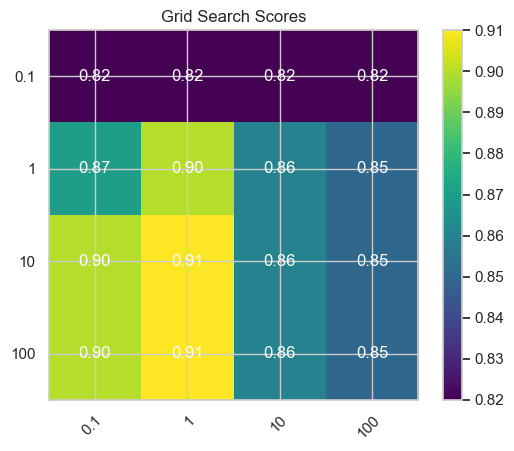

In [578]:
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
scores = []
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            svm = SVC(C=C, gamma=gamma, kernel=kernel)
            svm.fit(tfn, tl.ravel())
            score = svm.score(test_features[:50], test_labels[:50])
            scores.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}
print(best_parameters)
# Plot the scores as a heatmap
print(scores)
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']), len(param_grid['kernel']))
fig, ax = plt.subplots()
im = ax.imshow(scores.mean(axis=2), cmap='viridis')
ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = ax.text(j, i, "{:.2f}".format(scores.mean(axis=2)[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("Grid Search Scores")
fig.colorbar(im)
plt.show()

# random forest

In [579]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [580]:
scores =[]
for k in range(5, 20):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(train_features, train_labels.ravel())
    y_pred = rfc.predict(test_features)
    scores.append(accuracy_score(test_labels, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(5, 20), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

In [581]:
# Create random forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=116)####

# Fit model to training data
rf_model.fit(train_features, train_labels.ravel())

# Make predictions on test data
test_pred = rf_model.predict(test_features)

# Evaluate model performance
accuracy = accuracy_score(test_labels, test_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 93.25%


In [582]:
rfc = RandomForestClassifier(n_estimators=116, random_state=42)

# Fit the model on the training set
rfc.fit(train_features, train_labels.ravel())

# Make predictions on the validation set
y_pred_val = rfc.predict(test_features)

# Calculate the accuracy of the predictions on the validation set
acc_val = accuracy_score(test_labels, y_pred_val)

# Make predictions on the test set
y_pred_test = rfc.predict(test_features)

# Calculate the accuracy of the predictions on the test set
acc_test = accuracy_score(test_labels, y_pred_test)

y_pred_train = rfc.predict(train_features)
acc_train = accuracy_score(train_labels, y_pred_train)

print(f"Training set accuracy: {acc_train:.2f}")

print(f"Test set accuracy: {acc_test:.2f}")



Training set accuracy: 1.00
Test set accuracy: 0.94


In [583]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred_test, average='weighted')
recall = recall_score(test_labels, y_pred_test, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.94
Recall on test set: 0.94


# knn

In [584]:
from sklearn.neighbors import KNeighborsClassifier


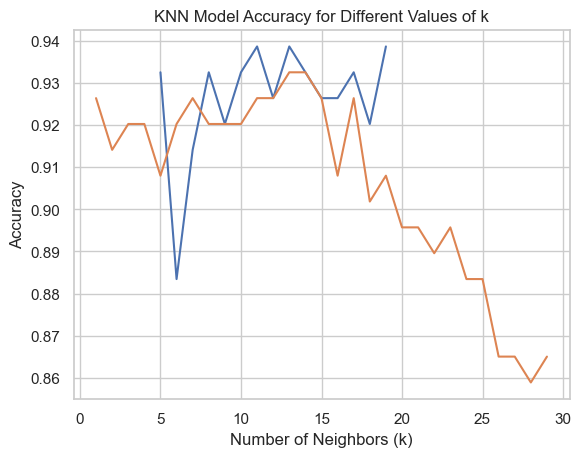

In [585]:
import matplotlib.pyplot as plt

k_values = []
accuracy_scores = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels.ravel())
    y_pred = knn.predict(test_features)
    score = accuracy_score(test_labels, y_pred)
    k_values.append(k)
    accuracy_scores.append(score)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different Values of k')
plt.show()

In [586]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit the KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=9)###
knn.fit(train_features, train_labels.ravel())

# Predict the classes of the testing data
test_pred = knn.predict(test_features)

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(test_labels, test_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 92.02%


In [587]:
# Train KNN model with different hyperparameters and choose the best one using validation set
best_k = None
best_score = 0.0
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels.ravel())
    y_pred = knn.predict(test_features)
    score = accuracy_score(test_labels, y_pred)
    if score > best_score:
        best_k = k
        best_score = score

# Test KNN model with best hyperparameters on test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_features, train_labels.ravel())
y_pred = knn.predict(test_features)
score = accuracy_score(test_labels, y_pred)
print("Test set accuracy: {:.4f}".format(score))

Test set accuracy: 0.9325


In [588]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.94
Recall on test set: 0.93


# logistic regression

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
write.csv(df_combined_train, "~/GSE_merging_data/train_DEG.csv")  # 41 genes out of 51
write.csv(df_combined_valid, "~/GSE_merging_data/valid_DEG.csv")
write.csv(df_combined_test, "~/GSE_merging_data/test_DEG.csv")

In [23]:
# Load the datasets
df_train = pd.read_csv("~/GSE_merging_data/train_DEG.csv")
df_valid = pd.read_csv("~/GSE_merging_data/valid_DEG.csv")
df_test = pd.read_csv("~/GSE_merging_data/test_DEG.csv")

In [24]:
df_train = df_train.drop(columns=['Unnamed: 0','platform.1'])
df_train

,group,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,ABCF1,ABI1,...,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX,Disease_state.1,tissue.1
0,1,0.051682,0.078277,0.079902,0.053911,0.066798,0.146738,0.113149,0.063079,0.253289,...,0.067257,0.056106,0.096641,0.095185,0.203120,0.057503,0.057908,0.085701,1,0
1,0,0.080585,0.086392,0.081652,0.064183,0.056001,0.121224,0.129185,0.052172,0.231511,...,0.060729,0.031162,0.104277,0.086131,0.200252,0.055330,0.050844,0.095962,1,0
2,1,0.075714,0.082653,0.081917,0.021598,0.104063,0.064311,0.131020,0.043160,0.110850,...,0.065509,0.048268,0.099943,0.034960,0.043708,0.075293,0.028880,0.070130,1,0
3,0,0.066769,0.081760,0.084585,0.061372,0.068451,0.124977,0.142612,0.064427,0.256957,...,0.072811,0.028163,0.097971,0.097821,0.210205,0.057568,0.039897,0.084029,0,0
4,0,0.083856,0.098437,0.083910,0.021344,0.115045,0.051935,0.096522,0.050544,0.112661,...,0.060835,0.035072,0.091956,0.045037,0.025374,0.005171,0.042815,0.099425,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0,0.088281,0.110375,0.083269,0.021462,0.110464,0.035865,0.094038,0.053121,0.106090,...,0.057118,0.028141,0.093186,0.035927,0.029160,0.017219,0.047323,0.097376,0,0
374,0,0.088192,0.108819,0.075416,0.023818,0.109555,0.053735,0.106447,0.053456,0.113770,...,0.065363,0.045864,0.095648,0.033115,0.040396,0.016755,0.035569,0.092822,1,0
375,0,0.076391,0.123748,0.078431,0.007201,0.116323,0.030486,0.100057,0.038588,0.107553,...,0.045509,0.038387,0.101453,0.041806,0.038358,0.032205,0.042295,0.107728,1,0
376,0,0.042543,0.086461,0.086330,0.076904,0.074628,0.142811,0.104807,0.055811,0.237593,...,0.051882,0.052437,0.108979,0.077410,0.216426,0.063036,0.042334,0.085055,0,0


In [25]:
df_valid = df_valid.drop(columns=['Unnamed: 0','platform.1'])
df_valid

,group,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,ABCF1,ABI1,...,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX,Disease_state.1,tissue.1
0,0,0.085613,0.100660,0.084717,0.020246,0.101537,0.051409,0.116877,0.051766,0.094191,...,0.065044,0.044177,0.104414,0.050516,0.039091,0.047188,0.039185,0.088504,1,0
1,0,0.078560,0.104086,0.087409,0.013124,0.120919,0.031441,0.100175,0.045846,0.117242,...,0.057955,0.040130,0.097857,0.038764,0.035705,0.028977,0.043789,0.100971,1,0
2,1,0.077977,0.090563,0.091011,0.067885,0.070728,0.144396,0.121764,0.051771,0.248977,...,0.077512,0.058975,0.107966,0.087180,0.142589,0.056420,0.027815,0.074643,1,0
3,0,0.084780,0.098535,0.073320,0.019616,0.106643,0.031760,0.109839,0.049434,0.109191,...,0.065193,0.041252,0.095140,0.031120,0.036319,0.034312,0.034326,0.088155,1,0
4,1,0.056667,0.019155,0.039174,0.037237,0.034163,0.116601,0.113472,0.021450,0.030191,...,0.061620,0.042572,0.017412,0.070030,0.018061,0.069915,0.023363,0.034545,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0.070325,0.137300,0.072254,0.053861,0.063395,0.130128,0.136714,0.049937,0.251778,...,0.061600,0.052531,0.097051,0.092512,0.206107,0.054049,0.043358,0.037937,0,0
159,0,0.041558,0.089937,0.086086,0.051210,0.120622,0.120476,0.133526,0.046980,0.255563,...,0.061987,0.008834,0.113568,0.087896,0.154210,0.054927,0.026410,0.088659,1,0
160,0,0.082880,0.093899,0.076138,0.019990,0.112112,0.046733,0.117748,0.045674,0.109924,...,0.052091,0.043571,0.082908,0.035271,0.041609,0.046463,0.036847,0.088173,1,0
161,0,0.079992,0.113752,0.085428,0.010882,0.130018,0.030199,0.112483,0.045781,0.107719,...,0.054136,0.028786,0.104877,0.024274,0.040415,0.048285,0.029998,0.079782,1,0


In [26]:
df_test = df_test.drop(columns=['Unnamed: 0','platform.1'])
df_test

,group,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,ABCF1,ABI1,...,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX,Disease_state.1,tissue.1
0,1,8.651411,0.000000,4.935460,5.149747,6.543805,3.277985,3.786596,6.773469,4.385431,...,4.944858,4.578939,5.375039,5.157852,6.977280,7.527477,4.277985,9.004221,1,0
1,0,8.638436,1.263034,5.381976,4.807355,6.680887,4.711495,3.446256,7.158862,4.255501,...,4.807355,5.116864,5.213347,5.523562,7.619853,6.525129,4.121015,8.772150,1,0
2,1,8.510566,1.432959,5.488644,4.781360,6.035624,4.412782,3.392317,6.915282,4.986411,...,5.228819,5.432959,4.949535,6.193772,8.037821,7.433794,3.916477,9.048214,1,0
3,0,8.715276,3.185866,5.189825,4.596935,5.885086,5.388878,3.678072,7.082149,5.350497,...,5.318317,5.419539,5.640968,5.870365,7.928962,6.687900,5.173927,8.903882,1,0
4,0,8.784308,2.678072,4.153805,4.689299,5.405992,4.765535,2.560715,7.216261,3.981853,...,4.000000,4.169925,5.074677,4.385431,7.288174,6.074677,3.572890,9.328002,1,0
5,1,8.391458,3.350497,5.145677,4.392317,7.164907,5.539159,3.972693,6.793116,5.465974,...,4.921246,6.011227,5.850499,5.412782,7.368070,6.866661,4.643856,9.251246,0,0
6,1,8.192293,4.035624,5.125155,5.008989,6.495056,5.289097,3.485427,6.900867,5.008989,...,5.078951,5.381976,6.133399,5.581954,7.704595,6.866661,4.554589,9.181152,0,0
7,1,8.378078,3.897240,4.930737,4.786596,6.529821,5.314697,3.217231,6.760221,4.240314,...,4.892391,5.510962,6.050937,5.942514,7.486232,7.330020,3.827819,8.301039,0,0
8,1,8.642774,1.378512,4.491853,4.754887,6.675251,5.044394,3.906891,7.059615,4.504620,...,4.872829,4.827819,6.251719,5.332708,7.374170,6.139551,3.944858,8.870365,0,0
9,1,8.155324,4.145677,4.765535,5.274262,7.134426,4.954196,2.906891,6.892391,4.683696,...,4.770829,4.852998,6.141596,5.812498,7.698357,6.407693,4.277985,8.674545,0,0


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


exclude_columns = ['Disease_state.1', 'group','tissue.1']

# Separate the columns to scale and the ones to exclude
columns_to_scale = [col for col in df_test.columns if col not in exclude_columns]
data_to_scale = df_test[columns_to_scale]
data_to_exclude = df_test[exclude_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data to scale
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the excluded columns
final_df = pd.concat([data_to_exclude.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

final_df

,Disease_state.1,group,tissue.1,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,...,ZNF22,ZNF24,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX
0,1,1,0,0.905392,-1.665580,1.244323,-1.684244,1.444164,-2.975774,-1.658308,...,-1.560548,-0.893544,-1.764436,-2.110746,1.308431,-1.942924,1.418270,-1.033552,-1.665447,-0.811293
1,1,0,0,0.890527,-0.896329,1.500630,-1.883424,1.588067,-1.636286,-1.819735,...,-1.871564,-1.200224,-1.845230,-1.858796,1.233999,-1.509491,1.622826,-1.935489,-1.759764,-1.057265
2,1,1,0,0.744021,-0.792837,1.561859,-1.898547,0.910695,-1.915407,-1.845318,...,-1.383833,-0.107700,-1.597589,-1.710745,1.112557,-0.715170,1.755881,-1.117850,-1.882664,-0.764664
3,1,0,0,0.978565,0.274770,1.390332,-2.005832,0.752667,-1.003331,-1.709782,...,-1.657220,-0.706689,-1.545003,-1.717031,1.430847,-1.098467,1.721227,-1.789023,-1.127108,-0.917642
4,1,0,0,1.057659,-0.034502,0.795641,-1.952101,0.249733,-1.585790,-2.239754,...,-2.055324,0.046458,-2.319609,-2.302318,1.170164,-2.858385,1.517240,-2.340817,-2.089113,-0.468117
5,0,1,0,0.607553,0.375038,1.364991,-2.124865,2.096171,-0.862907,-1.570042,...,-1.618889,-0.547139,-1.778310,-1.439900,1.527301,-1.640787,1.542674,-1.628170,-1.445608,-0.549470
6,0,1,0,0.379360,0.792314,1.353211,-1.766127,1.392988,-1.096568,-1.801156,...,-2.062305,-1.129098,-1.685647,-1.734625,1.657529,-1.440286,1.649802,-1.628170,-1.499245,-0.623762
7,0,1,0,0.592223,0.708032,1.241612,-1.895500,1.429484,-1.072647,-1.928363,...,-2.219685,-1.786792,-1.795265,-1.674211,1.619569,-1.012956,1.580289,-1.211228,-1.935935,-1.556597
8,0,1,0,0.895497,-0.825998,0.989686,-1.913946,1.582151,-1.325221,-1.601252,...,-1.975735,-1.931669,-1.806759,-1.994177,1.711996,-1.735688,1.544616,-2.282441,-1.865610,-0.953167
9,0,1,0,0.337003,0.859342,1.146783,-1.611810,2.064174,-1.409502,-2.075560,...,-2.011293,-0.994555,-1.866691,-1.982384,1.661302,-1.167049,1.647817,-2.041161,-1.665447,-1.160716


In [28]:
final_df = final_df[[col for col in final_df.columns if col not in ['Disease_state.1', 'tissue.1']] + ['Disease_state.1', 'tissue.1']]



In [29]:
df_combined = pd.concat([df_valid, final_df], ignore_index=True)

In [30]:
df_combined

,group,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,ABCF1,ABI1,...,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX,Disease_state.1,tissue.1
0,0,0.085613,0.100660,0.084717,0.020246,0.101537,0.051409,0.116877,0.051766,0.094191,...,0.065044,0.044177,0.104414,0.050516,0.039091,0.047188,0.039185,0.088504,1,0
1,0,0.078560,0.104086,0.087409,0.013124,0.120919,0.031441,0.100175,0.045846,0.117242,...,0.057955,0.040130,0.097857,0.038764,0.035705,0.028977,0.043789,0.100971,1,0
2,1,0.077977,0.090563,0.091011,0.067885,0.070728,0.144396,0.121764,0.051771,0.248977,...,0.077512,0.058975,0.107966,0.087180,0.142589,0.056420,0.027815,0.074643,1,0
3,0,0.084780,0.098535,0.073320,0.019616,0.106643,0.031760,0.109839,0.049434,0.109191,...,0.065193,0.041252,0.095140,0.031120,0.036319,0.034312,0.034326,0.088155,1,0
4,1,0.056667,0.019155,0.039174,0.037237,0.034163,0.116601,0.113472,0.021450,0.030191,...,0.061620,0.042572,0.017412,0.070030,0.018061,0.069915,0.023363,0.034545,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0,-0.800070,0.567656,-0.255885,0.473136,-0.411498,0.162578,0.992128,-0.238582,-1.647925,...,0.274710,0.502154,-1.965459,0.736589,-0.082454,0.696544,0.016268,-1.103423,1,1
205,1,0.460412,0.992660,0.240029,0.636605,-1.649342,-0.202400,0.401951,0.285599,-0.775542,...,0.609598,0.400933,0.056469,0.368979,-0.346698,0.964099,0.603867,0.818774,1,1
206,0,0.734931,-0.515984,0.112372,0.607532,0.055645,-0.800590,0.610429,0.468137,-0.775542,...,0.735718,0.214759,0.206768,0.569820,-1.542022,1.084308,0.621615,0.976114,1,1
207,1,0.937553,-0.363735,-1.675960,0.912205,-0.644036,-0.854237,0.375816,0.586637,-0.635120,...,0.995503,0.266914,-0.673141,1.189570,-0.227514,0.772764,1.088371,1.064024,1,1


In [31]:
df_train

,group,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,ABCF1,ABI1,...,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX,Disease_state.1,tissue.1
0,1,0.051682,0.078277,0.079902,0.053911,0.066798,0.146738,0.113149,0.063079,0.253289,...,0.067257,0.056106,0.096641,0.095185,0.203120,0.057503,0.057908,0.085701,1,0
1,0,0.080585,0.086392,0.081652,0.064183,0.056001,0.121224,0.129185,0.052172,0.231511,...,0.060729,0.031162,0.104277,0.086131,0.200252,0.055330,0.050844,0.095962,1,0
2,1,0.075714,0.082653,0.081917,0.021598,0.104063,0.064311,0.131020,0.043160,0.110850,...,0.065509,0.048268,0.099943,0.034960,0.043708,0.075293,0.028880,0.070130,1,0
3,0,0.066769,0.081760,0.084585,0.061372,0.068451,0.124977,0.142612,0.064427,0.256957,...,0.072811,0.028163,0.097971,0.097821,0.210205,0.057568,0.039897,0.084029,0,0
4,0,0.083856,0.098437,0.083910,0.021344,0.115045,0.051935,0.096522,0.050544,0.112661,...,0.060835,0.035072,0.091956,0.045037,0.025374,0.005171,0.042815,0.099425,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0,0.088281,0.110375,0.083269,0.021462,0.110464,0.035865,0.094038,0.053121,0.106090,...,0.057118,0.028141,0.093186,0.035927,0.029160,0.017219,0.047323,0.097376,0,0
374,0,0.088192,0.108819,0.075416,0.023818,0.109555,0.053735,0.106447,0.053456,0.113770,...,0.065363,0.045864,0.095648,0.033115,0.040396,0.016755,0.035569,0.092822,1,0
375,0,0.076391,0.123748,0.078431,0.007201,0.116323,0.030486,0.100057,0.038588,0.107553,...,0.045509,0.038387,0.101453,0.041806,0.038358,0.032205,0.042295,0.107728,1,0
376,0,0.042543,0.086461,0.086330,0.076904,0.074628,0.142811,0.104807,0.055811,0.237593,...,0.051882,0.052437,0.108979,0.077410,0.216426,0.063036,0.042334,0.085055,0,0


In [32]:
# Assuming the target column is named 'target'
X_train = df_train.drop(columns=['group'])
y_train = df_train['group']

#X_valid = df_valid.drop(columns=['group'])
#y_valid = df_valid['group']

X_test = df_combined.drop(columns=['group'])
y_test = df_combined['group']

In [33]:
X_test

,AARS,ABCA1,ABCA8,ABCC1,ABCC5,ABCD3,ABCE1,ABCF1,ABI1,ABL1,...,ZNF266,ZNF330,ZNF423,ZNF638,ZNF91,ZNHIT3,ZSWIM8,ZYX,Disease_state.1,tissue.1
0,0.085613,0.100660,0.084717,0.020246,0.101537,0.051409,0.116877,0.051766,0.094191,0.068337,...,0.065044,0.044177,0.104414,0.050516,0.039091,0.047188,0.039185,0.088504,1,0
1,0.078560,0.104086,0.087409,0.013124,0.120919,0.031441,0.100175,0.045846,0.117242,0.062222,...,0.057955,0.040130,0.097857,0.038764,0.035705,0.028977,0.043789,0.100971,1,0
2,0.077977,0.090563,0.091011,0.067885,0.070728,0.144396,0.121764,0.051771,0.248977,0.034720,...,0.077512,0.058975,0.107966,0.087180,0.142589,0.056420,0.027815,0.074643,1,0
3,0.084780,0.098535,0.073320,0.019616,0.106643,0.031760,0.109839,0.049434,0.109191,0.062030,...,0.065193,0.041252,0.095140,0.031120,0.036319,0.034312,0.034326,0.088155,1,0
4,0.056667,0.019155,0.039174,0.037237,0.034163,0.116601,0.113472,0.021450,0.030191,0.032895,...,0.061620,0.042572,0.017412,0.070030,0.018061,0.069915,0.023363,0.034545,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-0.800070,0.567656,-0.255885,0.473136,-0.411498,0.162578,0.992128,-0.238582,-1.647925,-0.617283,...,0.274710,0.502154,-1.965459,0.736589,-0.082454,0.696544,0.016268,-1.103423,1,1
205,0.460412,0.992660,0.240029,0.636605,-1.649342,-0.202400,0.401951,0.285599,-0.775542,-0.451589,...,0.609598,0.400933,0.056469,0.368979,-0.346698,0.964099,0.603867,0.818774,1,1
206,0.734931,-0.515984,0.112372,0.607532,0.055645,-0.800590,0.610429,0.468137,-0.775542,0.219828,...,0.735718,0.214759,0.206768,0.569820,-1.542022,1.084308,0.621615,0.976114,1,1
207,0.937553,-0.363735,-1.675960,0.912205,-0.644036,-0.854237,0.375816,0.586637,-0.635120,0.770867,...,0.995503,0.266914,-0.673141,1.189570,-0.227514,0.772764,1.088371,1.064024,1,1


In [34]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
logistic_model

LogisticRegression()

In [36]:
# Predict on training data
train_pred = logistic_model.predict(X_train)

# Predict on validation data
#valid_pred = logistic_model.predict(X_valid)

# Predict on test data
test_pred = logistic_model.predict(X_test)

In [37]:
# Calculate accuracy for training data
train_accuracy = accuracy_score(y_train, train_pred)

# Calculate accuracy for validation data
#valid_accuracy = accuracy_score(y_valid, valid_pred)

# Calculate accuracy for test data
test_accuracy = accuracy_score(y_test, test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
#print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8915
Test Accuracy: 0.8182


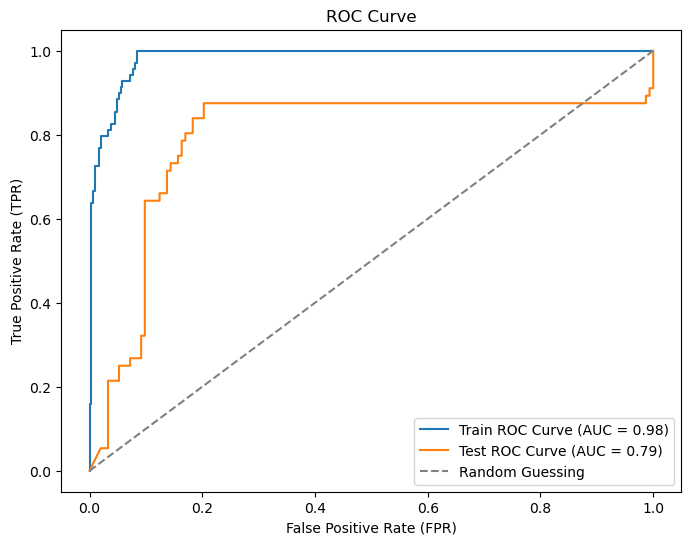

In [38]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get Predicted Probabilities for the Positive Class
# Use the best SVM model to get predicted probabilities
train_probs = logistic_model.predict_proba(X_train)[:, 1]  # Probabilities for the positive class
test_probs = logistic_model.predict_proba(X_test)[:, 1]

# Step 2: Calculate ROC Curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)

# Step 3: Calculate AUC (Area Under the Curve)
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [39]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100,1000],  # Regularization parameter
    'kernel': ['linear', 'rbf','sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_svm_model = grid_search.best_estimator_

# Step 6: Make Predictions
train_pred = best_svm_model.predict(X_train)
#valid_pred = best_svm_model.predict(X_valid)
test_pred = best_svm_model.predict(X_test)

# Step 7: Calculate Accuracy
train_accuracy = accuracy_score(y_train, train_pred)
#valid_accuracy = accuracy_score(y_valid, valid_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Step 8: Print the Accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
#print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy: 0.9974
Test Accuracy: 0.8278


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report




# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf')

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Detailed classification report for training data
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Detailed classification report for test data
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.96

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       309
           1       0.98      0.78      0.87        69

    accuracy                           0.96       378
   macro avg       0.97      0.89      0.92       378
weighted avg       0.96      0.96      0.96       378


Test Accuracy: 0.83

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       153
           1       0.70      0.66      0.68        56

    accuracy                           0.83       209
   macro avg       0.79      0.78      0.78       209
weighted avg       0.83      0.83      0.83       209

